# Predict the performance of vehicle

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from math import sqrt


import re

import warnings
warnings.filterwarnings('ignore')

In [136]:
df=pd.read_csv('vehicle performance prediction.csv')
df.sample(20)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
323,1,4,156.0,105,2800,14.4,1980,dodge colt,11.861509
37,1,6,232.0,100,3288,15.5,1971,amc matador,7.652587
274,2,5,131.0,103,2830,15.9,1978,audi 5000,8.630417
185,1,4,98.0,79,2255,17.7,1976,dodge colt,11.053736
119,2,4,114.0,91,2582,14.0,1973,audi 100ls,8.502874
172,2,4,90.0,71,2223,16.5,1975,volkswagen dasher,10.628593
12,1,8,400.0,150,3761,9.5,1970,chevrolet monte carlo,6.377156
197,2,4,90.0,70,1937,14.2,1976,vw rabbit,12.329168
95,1,8,455.0,225,4951,11.0,1973,buick electra 225 custom,5.101724
77,2,4,121.0,76,2511,18.0,1972,volkswagen 411 (sw),9.353162


In [137]:
df.shape

(398, 9)

In [138]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [139]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [140]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [141]:
df.describe(include='object')

,horsepower,name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [142]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [143]:
df.horsepower=df.horsepower.replace('?',np.NaN)
df.horsepower=df.horsepower.replace(np.NaN,df.horsepower.median())
df.horsepower=df.horsepower.astype('float64')

In [144]:
df.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [145]:
df.origin=df.origin.astype('object')

In [146]:
df[['Manufacturer', 'Model']] = df['name'].str.split(' ', n=1, expand=True)


In [147]:
df.drop(['name'],axis=1,inplace=True)

In [148]:
df.sample(20)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,Manufacturer,Model
79,2,4,96.0,69.0,2189,18.0,1972,11.053736,renault,12 (sw)
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino
210,3,6,156.0,108.0,2930,15.5,1976,8.077730,toyota,mark ii
90,1,8,429.0,198.0,4952,11.5,1973,5.101724,mercury,marquis brougham
99,1,6,232.0,100.0,2945,16.0,1973,7.652587,amc,hornet
384,3,4,91.0,67.0,1965,15.7,1982,13.604599,honda,civic (auto)
224,1,8,302.0,130.0,4295,14.9,1977,6.377156,mercury,cougar brougham
185,1,4,98.0,79.0,2255,17.7,1976,11.053736,dodge,colt
370,1,4,112.0,85.0,2575,16.2,1982,13.179455,pontiac,j2000 se hatchback
300,1,8,260.0,90.0,3420,22.2,1979,10.160935,oldsmobile,cutlass salon brougham


In [149]:
df.Manufacturer.nunique()

37

In [150]:
df.Manufacturer=df.Manufacturer.replace({'chevroelt':'chevrolet','toyouta':'toyota','maxda':'mazda','vw':'volkswagen','vokswagen':'volkswagen','chevy':'chevrolet','mercedes-benz':'mercedes'})

In [151]:
df.Manufacturer.nunique()

30

In [152]:
df.Model.nunique()

299

In [153]:
pattern = r'[^a-zA-Z0-9\s]'
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text

df['Model'] = df['Model'].apply(remove_special_characters)


In [154]:
df.describe(include='object')

,origin,Manufacturer,Model
count,398,398,398
unique,3,30,297
top,1,ford,pinto
freq,249,51,6


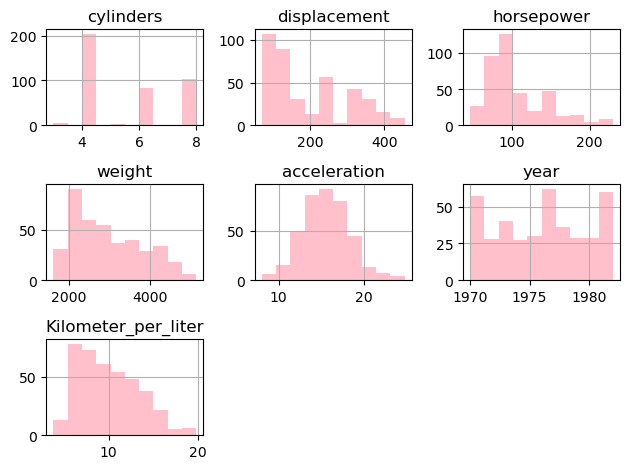

In [155]:
df.hist(color='pink')
plt.tight_layout()
plt.show()

In [156]:
df.Kilometer_per_liter.describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

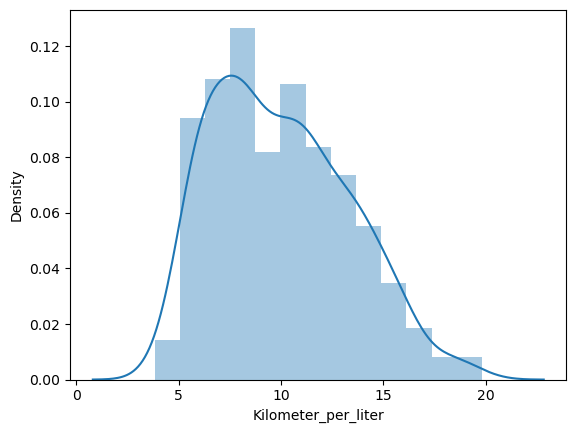

In [157]:
sns.distplot(df.Kilometer_per_liter)
plt.show()

In [158]:
df.Kilometer_per_liter.skew()

0.4570663438355477

In [159]:
df1=df.copy()

### approach 1
Dropping the Model column and Label Encoding the origin and manufacturer column

In [160]:
df1.drop(['Model'],axis=1,inplace=True)

In [161]:
Le=LabelEncoder()
df1.Manufacturer=Le.fit_transform(df1.Manufacturer)

In [162]:
df1=pd.get_dummies(df1,columns=['origin'])

In [163]:
df1.sample(20)

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,Manufacturer,origin_1,origin_2,origin_3
329,4,91.0,67.0,1850,13.8,1980,18.961409,13,0,0,1
260,6,225.0,110.0,3620,18.7,1978,7.907673,9,1,0,0
367,4,112.0,88.0,2605,19.6,1982,11.904024,6,1,0,0
86,8,304.0,150.0,3672,11.5,1973,5.952012,0,1,0,0
253,6,200.0,95.0,3155,18.2,1978,8.715446,6,1,0,0
104,8,400.0,167.0,4906,12.5,1973,5.101724,11,1,0,0
334,3,70.0,100.0,2420,12.5,1980,10.075906,14,0,0,1
215,8,318.0,150.0,3755,14.0,1976,5.526868,9,1,0,0
58,4,97.5,80.0,2126,17.0,1972,10.628593,9,1,0,0
232,8,351.0,149.0,4335,14.5,1977,6.802299,11,1,0,0


In [165]:
x=df1.drop(['Kilometer_per_liter'],axis=1)
y=df1.Kilometer_per_liter

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [168]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [169]:
model.score(x_train,y_train)

0.8147067242488426

In [170]:
model.score(x_test,y_test)

0.8448784995529226

### Approach 2
Dropping the columns Manufacturer and Model and encoding the column Origin

In [171]:
df2=df.copy()

In [172]:
df2.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [173]:
df2=pd.get_dummies(df2,columns=['origin'])

In [177]:
x2=df2.drop(['Kilometer_per_liter'],axis=1)
y2=df2.Kilometer_per_liter

In [178]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=1)

In [179]:
model=LinearRegression()
model.fit(x2_train,y2_train)

LinearRegression()

In [180]:
model.score(x2_train,y2_train)

0.8141025501508696

In [181]:
model.score(x2_test,y2_test)

0.8433135133439611

## Log transformation on dependent variable 

In [182]:
df1.Kilometer_per_liter=np.log(df1.Kilometer_per_liter)

<Axes: xlabel='Kilometer_per_liter', ylabel='Density'>

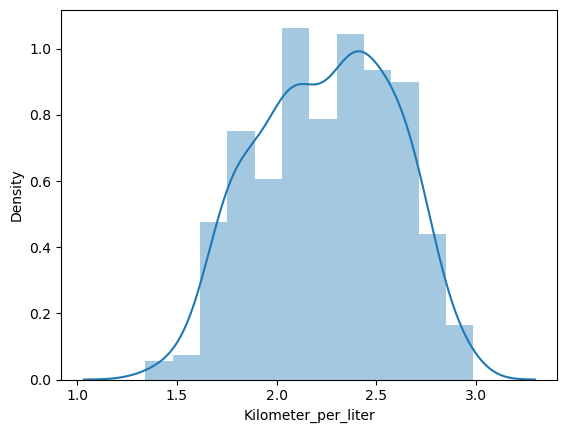

In [183]:
sns.distplot(df1.Kilometer_per_liter)

In [184]:
df1.Kilometer_per_liter.skew()

-0.13649360910230762

### Approach 3
Approach 1 using log data

In [447]:
x3=df1.drop(['Kilometer_per_liter'],axis=1)
y3=df1.Kilometer_per_liter

In [448]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.3,random_state=1)

In [449]:
model_a3=LinearRegression()
model_a3.fit(x3_train,y3_train)

LinearRegression()

In [450]:
model_a3.score(x3_train,y3_train)

0.8759659462040733

In [451]:
model_a3.score(x3_test,y3_test)

0.8930090998356024

### Approach 4
Approach 2 using log data

In [190]:
df2.Kilometer_per_liter=np.log(df2.Kilometer_per_liter)

<Axes: xlabel='Kilometer_per_liter', ylabel='Density'>

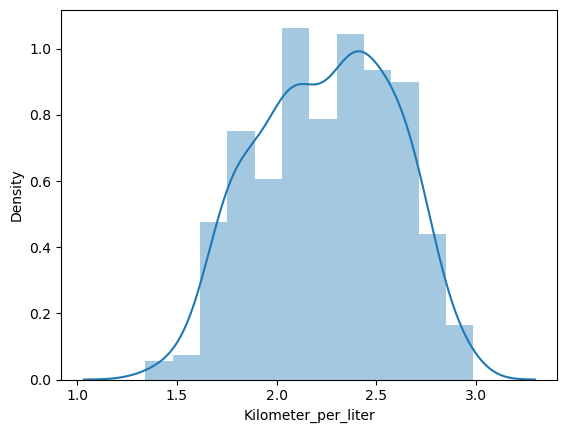

In [191]:
sns.distplot(df2.Kilometer_per_liter)

In [194]:
x4=df2.drop(['Kilometer_per_liter'],axis=1)
y4=df2.Kilometer_per_liter

In [195]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.3,random_state=1)

In [196]:
model=LinearRegression()
model.fit(x4_train,y4_train)

LinearRegression()

In [197]:
model.score(x4_train,y4_train)

0.8754833909857919

In [198]:
model.score(x4_test,y4_test)

0.8926765698625599

## Polynomial Regression

In [237]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train_p=poly.fit_transform(x4_train)
x_test_p=poly.fit_transform(x4_test)

In [238]:
model_poly=LinearRegression()
model_poly.fit(x_train_p,y_train)

LinearRegression()

In [239]:
model_poly.score(x_train_p,y_train)

0.9015443648681468

In [240]:
model_poly.score(x_test_p,y_test)

0.8650763367231838

### Analysis of cylinders

<Axes: xlabel='cylinders', ylabel='Count'>

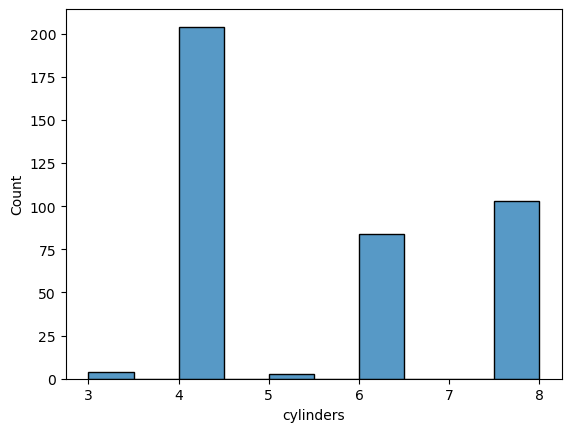

In [246]:
sns.histplot(df.cylinders)

In [247]:
df.cylinders=df.cylinders.astype('object')

In [248]:
df.year.value_counts()

1973    40
1978    36
1976    34
1982    31
1975    30
1970    29
1979    29
1980    29
1981    29
1971    28
1972    28
1977    28
1974    27
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

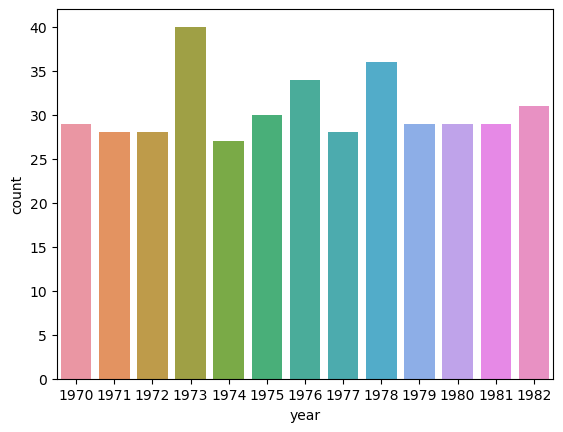

In [259]:
sns.countplot(data=df,x='year')

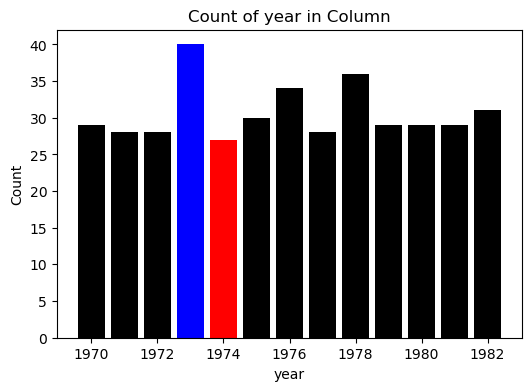

In [268]:
value_counts = df['year'].value_counts()

# Get the maximum and minimum values
max_value = value_counts.max()
min_value = value_counts.min()

# Plot the count of values in the 'Category' column using Matplotlib bar
plt.figure(figsize=(6, 4))
colors = ['red' if count == min_value else 'blue' if count == max_value else 'black' for count in value_counts.values]
plt.bar(value_counts.index, value_counts.values, color=colors)

plt.title('Count of year in Column')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()


In [266]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

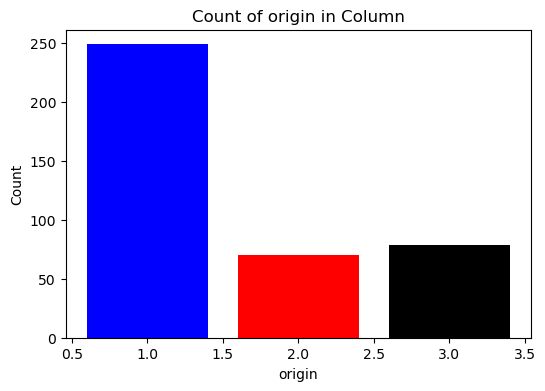

In [269]:
value_counts = df['origin'].value_counts()

# Get the maximum and minimum values
max_value = value_counts.max()
min_value = value_counts.min()

# Plot the count of values in the 'Category' column using Matplotlib bar
plt.figure(figsize=(6, 4))
colors = ['red' if count == min_value else 'blue' if count == max_value else 'black' for count in value_counts.values]
plt.bar(value_counts.index, value_counts.values, color=colors)

plt.title('Count of origin in Column')
plt.xlabel('origin')
plt.ylabel('Count')
plt.show()

In [270]:
df.horsepower.value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
75.0     14
95.0     14
105.0    12
70.0     12
67.0     12
65.0     10
97.0      9
85.0      9
80.0      7
145.0     7
140.0     7
92.0      6
68.0      6
78.0      6
84.0      6
93.5      6
72.0      6
180.0     5
71.0      5
86.0      5
115.0     5
130.0     5
60.0      5
170.0     5
175.0     5
83.0      4
120.0     4
76.0      4
165.0     4
52.0      4
190.0     3
125.0     3
215.0     3
48.0      3
63.0      3
112.0     3
225.0     3
96.0      3
69.0      3
74.0      3
129.0     2
98.0      2
198.0     2
53.0      2
81.0      2
79.0      2
153.0     2
58.0      2
62.0      2
87.0      2
46.0      2
160.0     2
155.0     2
139.0     2
66.0      1
149.0     1
132.0     1
64.0      1
116.0     1
77.0      1
89.0      1
142.0     1
135.0     1
138.0     1
133.0     1
103.0     1
107.0     1
108.0     1
102.0     1
220.0     1
113.0     1
200.0     1
210.0     1
193.0     1
54.0      1
208.0     1
137.0     1
158.0     1
167.

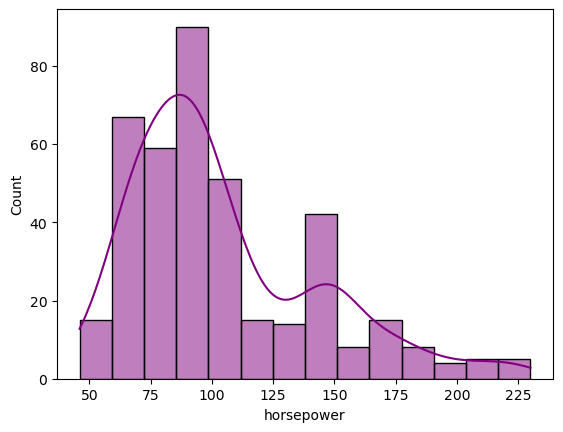

In [278]:
sns.histplot(data=df,x='horsepower',kde=True,color='purple')
plt.show()

In [279]:
df.Manufacturer.value_counts()

ford          51
chevrolet     47
plymouth      31
amc           28
dodge         28
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
renault        5
saab           4
opel           4
subaru         4
mercedes       3
cadillac       2
bmw            2
capri          1
hi             1
triumph        1
nissan         1
Name: Manufacturer, dtype: int64

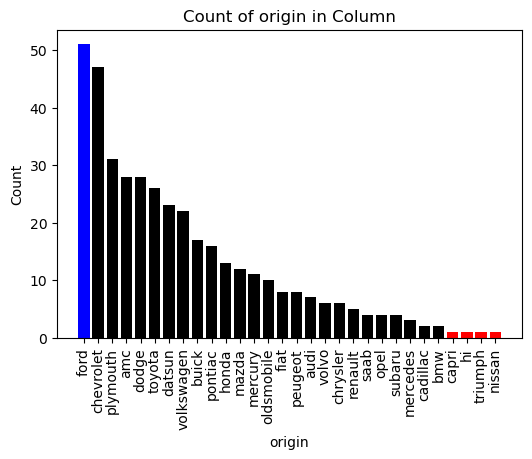

In [282]:
value_counts = df['Manufacturer'].value_counts()

# Get the maximum and minimum values
max_value = value_counts.max()
min_value = value_counts.min()

# Plot the count of values in the 'Category' column using Matplotlib bar
plt.figure(figsize=(6, 4))
colors = ['red' if count == min_value else 'blue' if count == max_value else 'black' for count in value_counts.values]
plt.bar(value_counts.index, value_counts.values, color=colors)

plt.title('Count of origin in Column')
plt.xlabel('origin')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [285]:
m=df.Model.value_counts()

In [288]:
m[0:21]

pinto              6
maverick           5
rabbit             5
corolla            5
matador            5
504                4
hornet             4
gremlin            4
corona             4
chevette           4
impala             4
dasher             3
colt               3
vega               3
nova               3
citation           3
caprice classic    3
gran torino        3
chevelle malibu    3
civic              3
duster             3
Name: Model, dtype: int64

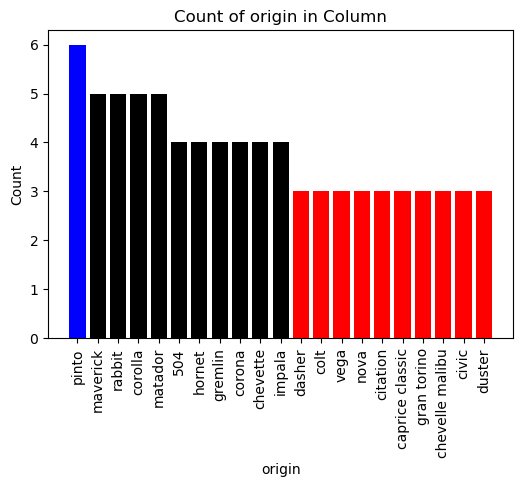

In [289]:
value_counts =m[0:21]

# Get the maximum and minimum values
max_value = value_counts.max()
min_value = value_counts.min()

# Plot the count of values in the 'Category' column using Matplotlib bar
plt.figure(figsize=(6, 4))
colors = ['red' if count == min_value else 'blue' if count == max_value else 'black' for count in value_counts.values]
plt.bar(value_counts.index, value_counts.values, color=colors)

plt.title('Count of origin in Column')
plt.xlabel('origin')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

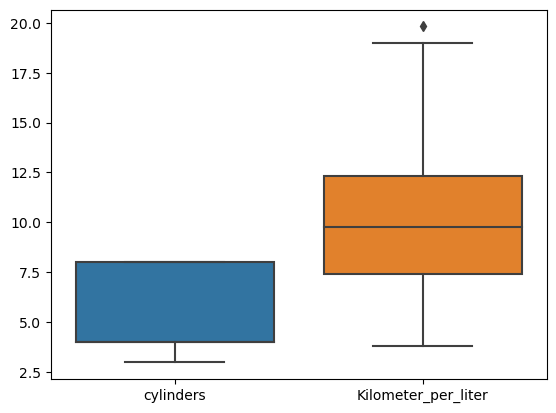

In [293]:
sns.boxplot(df[['cylinders','Kilometer_per_liter']])
plt.show()

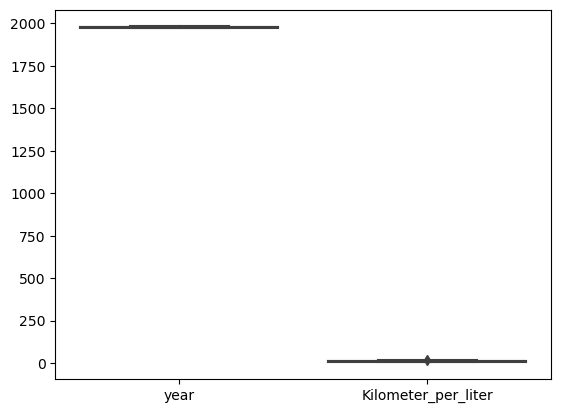

In [294]:
sns.boxplot(df[['year','Kilometer_per_liter']])
plt.show()

<Axes: >

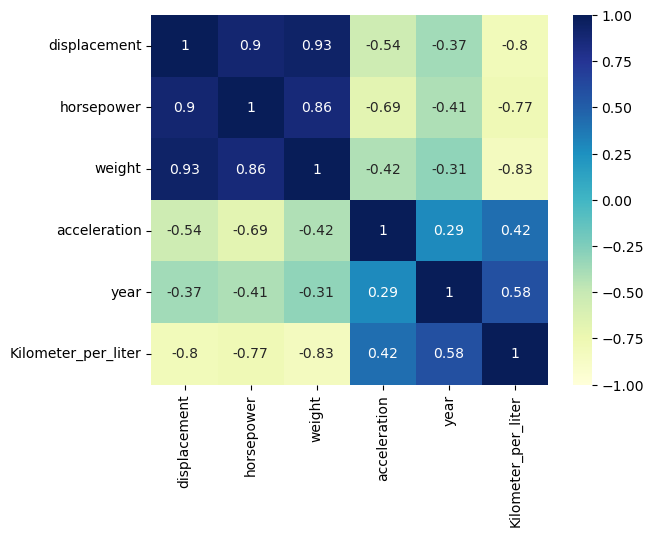

In [323]:
sns.heatmap(df.corr(),annot=True,vmin=-1.0,cmap='YlGnBu')

In [416]:
df4=df.copy()
df4.drop(['displacement','weight','Manufacturer','Model'],axis=1,inplace=True)

In [417]:
df4.dtypes

origin                  object
cylinders               object
horsepower             float64
acceleration           float64
year                   float64
Kilometer_per_liter    float64
dtype: object

In [418]:
df4=pd.get_dummies(df4,columns=['origin','cylinders'],drop_first=True)

In [469]:
x=df4.drop(['Kilometer_per_liter'],axis=1)
y=df4.Kilometer_per_liter

In [488]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.3,random_state=1)

In [489]:
model4=LinearRegression()
model4.fit(x4_train,y4_train)

LinearRegression()

In [490]:
model4.score(x4_train,y4_train)

0.8754833909857919

In [491]:
model4.score(x4_test,y4_test)

0.8926765698625599

In [492]:
x4_train_p=poly.fit_transform(x4_train)
x4_test_p=poly.fit_transform(x4_test)

In [493]:
model4_poly=LinearRegression()
model4_poly.fit(x4_train_p,y4_train)

LinearRegression()

In [494]:
model4_poly.score(x4_train_p,y4_train)

0.9192822608027547

In [495]:
model4_poly.score(x4_test_p,y4_test)

0.8848718360398243

In [428]:
scaler=MinMaxScaler()

In [429]:
columns_to_scale = [ 'horsepower', 'acceleration', 'year', 'Kilometer_per_liter']


df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])


In [430]:
xs=df4.drop(['Kilometer_per_liter'],axis=1)
ys=df4.Kilometer_per_liter

In [431]:
xs_train,xs_test,ys_train,ys_test=train_test_split(xs,ys,test_size=0.3,random_state=1)

In [432]:
modelsgd=SGDRegressor(loss='epsilon_insensitive')
modelsgd.fit(xs_train,ys_train)

SGDRegressor(loss='epsilon_insensitive')

In [433]:
modelsgd.score(xs_train,ys_train)

0.7488197070453

In [434]:
modelsgd.score(xs_test,ys_test)

0.8076273742026283

In [435]:
r2=modelsgd.score(xs_train,ys_train)

In [436]:
y_pred_sgd=modelsgd.predict(xs_test)

In [478]:
n=xs_train.shape[0]
p=xs_train.shape[1]
n_test=xs_test.shape[0]
p_test=xs_test.shape[1]
n_a3=x3_train.shape[0]
p_a3=x3_train.shape[1]
n4=x4_train_p.shape[0]
p4=x4_train_p.shape[1]

In [496]:
adj_r = 1-(1-r2)*(n-1)/(n-p-1)
rmse_sgd = sqrt(mean_squared_error(ys_test,y_pred_sgd))

r2_test=modelsgd.score(xs_test,ys_test)
adj_r_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)

In [497]:
r2_a3=model_a3.score(x3_test,y3_test)
adj_r_a3 = 1-(1-r2_a3)*(n_a3-1)/(n_a3-p_a3-1)
y_pred_a3=model_a3.predict(x3_test)
rmse_a3 = sqrt(mean_squared_error(y3_test,y_pred_a3))

In [498]:
r2_a4_p=model4_poly.score(x4_test_p,y4_test)
adj_r_a4_p = 1-(1-r2_a4_p)*(n4-1)/(n4-p4-1)
y_pred_a4=model4_poly.predict(x4_test_p)
rmse_a4 = sqrt(mean_squared_error(y4_test,y_pred_a4))

In [501]:
SGD_metrics=pd.DataFrame({'model':['SGD','Linear regression','Polynomial regression'],'R-squared':[r2_test,r2_a3,r2_a4_p],'Adj_R-squared':[adj_r_test,adj_r_a3,adj_r_a4_p],"RMSE":[rmse_sgd,rmse_a3,rmse_a4]})

In [502]:
SGD_metrics

,model,R-squared,Adj_R-squared,RMSE
0,SGD,0.807627,0.791888,0.089195
1,Linear regression,0.893009,0.889002,0.110621
2,Polynomial regression,0.884872,0.861946,0.114751
